In [100]:
import pandas as pd
import matplotlib.pyplot as plt
from functions import get_data
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# This needs work and is simply a test to get things running. Will return to this soon.

In [101]:
# Get the astroid data
df = pd.read_csv('../input/asteroid_data.csv', index_col=0)
print(len(df))

644


In [102]:
df.keys()

Index(['magnitude', 'min_diameter', 'max_diameter', 'speed', 'miss_distance',
       'target'],
      dtype='object')

In [104]:
# Get the X columns
columns = df.columns
columns = columns.drop('target')

In [105]:
X_train, X_test, y_train, y_test = train_test_split(df[columns],df['target'],test_size=0.2)

In [106]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [107]:
pca = PCA(2)
pca_df = pca.fit_transform(X_train)

In [108]:
pca.components_

array([[-0.3335976 ,  0.22264121,  0.22264121,  0.35119757,  0.81623201],
       [-0.54613346,  0.3862009 ,  0.3862009 ,  0.29675871, -0.56157834]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


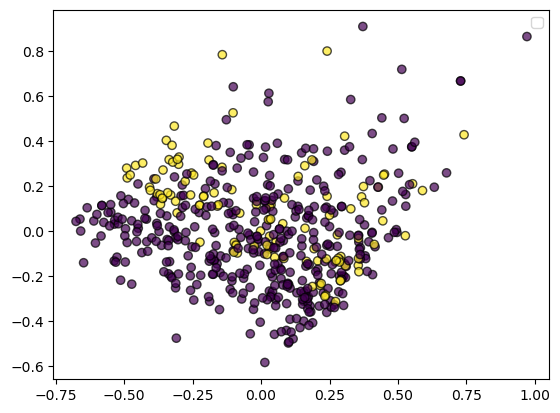

In [109]:
# Just for visuals
plt.scatter(pca_df[:, 0], pca_df[:, 1], c=y_train, cmap='viridis', edgecolor='k', alpha=0.7)
plt.legend()
plt.show()

<Axes: >

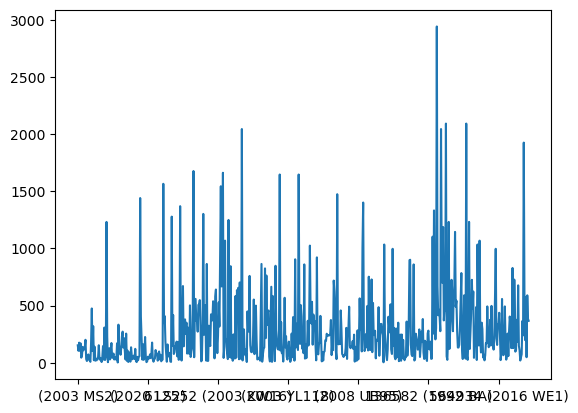

In [110]:
# Just for visuals
df['min_diameter'].plot()

In [111]:
print(len(y_test))

129


In [112]:
test_results = {}

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
score = knn.score(X_test, y_test)
print(f'KNN: {score}')
test_results['KNN'] = [score, knn]

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
score = tree.score(X_test, y_test)
print(f'Tree: {score}')
test_results['Tree'] = [score, tree]

lin = LogisticRegression()
lin.fit(X_train, y_train)
score = lin.score(X_test, y_test)
print(f'Linear: {score}')
test_results['Linear'] = [score, lin]

naive = GaussianNB()
naive.fit(X_train, y_train)
score = naive.score(X_test, y_test)
print(f'NB: {score}')
test_results['NB'] = [score, naive]

svc = LinearSVC()
svc.fit(X_train, y_train)
score = svc.score(X_test, y_test)
print(f'SVC: {score}')
test_results['SVC'] = [score, svc]



KNN: 0.7674418604651163
Tree: 0.7286821705426356
Linear: 0.813953488372093
NB: 0.751937984496124
SVC: 0.813953488372093


In [113]:
# Get the model that performed the best
max_model = max(test_results, key=lambda x: test_results[x][0])
model = test_results[max_model][1]

In [114]:
print(model)

LogisticRegression()


In [115]:
preds = model.predict(X_test)

In [116]:
print(preds)
print(y_test.to_list())

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [117]:
# Poor results, may need grid search
print(f'Precision: {precision_score(y_test, preds)}')
print(f'Recall: {recall_score(y_test, preds)}')
print(f'F1: {f1_score(y_test, preds)}')

Precision: 0.0
Recall: 0.0
F1: 0.0


/home/joe/anaconda3/envs/workshop/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
